<a href="https://colab.research.google.com/github/GabrielRenno/bootcampalura/blob/main/Gabriel_Renn%C3%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Resumo:

Comparação entre o PIB(2017) de cada estado com a taxa de mortalidade do vírus Covid-19. O objetivo era analisar se um alto PIB, seria convertido em uma taxa de mortalidade menor, pois teoricamente os estados com maior PIB possuem mais recursos para aplicar na saúde.

Conclusão: Um PIB alto não se converte em menor mortalidade. A variável PIB possui uma correlação com a variavel mortalidade muito próxima de zero(0.33). Isso pode ocorrer por vários motivos, entre eles:

- O governo dos estados não converte a riqueza produzida em investimento na saúde como deveria.
- A alta mortalidade do vírus pode ser causada por outros fatores, como densidade demográfica, idade dos pacientes, carga viral, capacidade dos hospitais, data de início do tratamento, mutação do vírus entre outras mais. Portanto apenas o PIB é muito pouco para encontrar um padrão na taxa de mortalidade.

Dados utilizados: Covid-19 Brasil.io e PIB 2017 IBGE


Hipótese: os estados com menor taxa de mortalidade são os que possuem maior PIB, já que indiretamente são os que possuem mais recursos para tratar os doentes.



## Análise dos dados:


Baixando o pacote pandas e os dados usados.


Link para  os dados: https://github.com/reiskleiton/bootcampAluraDS/blob/main/datasets/brazil_io/caso.csv.gz?raw=true

In [ ]:
#Os dados foram baixados diretamente da internet para evitar ter que carrega-los sempre que se conectar ao notebook.

import pandas as pd

zip_file_url = 'https://github.com/reiskleiton/bootcampAluraDS/blob/main/datasets/brazil_io/caso.csv.gz?raw=true'
dados_covid = pd.read_csv(zip_file_url, compression='gzip', na_values=['Importados/Indefinidos'])
df = dados_covid
df.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-17,AC,NaN,state,33475,709,246,True,881935.0,894470.0,12.0,3742.43966,0.0212
1,2020-11-16,AC,NaN,state,33295,708,245,False,881935.0,894470.0,12.0,3722.31601,0.0213
2,2020-11-15,AC,NaN,state,33156,708,244,False,881935.0,894470.0,12.0,3706.77608,0.0214
3,2020-11-14,AC,NaN,state,32991,708,243,False,881935.0,894470.0,12.0,3688.32940,0.0215
4,2020-11-13,AC,NaN,state,32661,707,242,False,881935.0,894470.0,12.0,3651.43605,0.0216


Primeiro vamos dropar as colunas que não serão aproveitadas no estudo

In [ ]:
#utilizando a função do pandas df.drop iremos remover as colunas não aproveitaveis


df = df.drop(columns=['city', 'order_for_place', 'estimated_population_2019', 
                      'city_ibge_code', "confirmed_per_100k_inhabitants", 'death_rate'])
df.head()

,date,state,place_type,confirmed,deaths,is_last,estimated_population
0,2020-11-17,AC,state,33475,709,True,894470.0
1,2020-11-16,AC,state,33295,708,False,894470.0
2,2020-11-15,AC,state,33156,708,False,894470.0
3,2020-11-14,AC,state,32991,708,False,894470.0
4,2020-11-13,AC,state,32661,707,False,894470.0


Agora vamos verificar se há algum valor ausente no nosso dataset

In [ ]:
#A função isna retorna valores booleanos para indicar se o valor é NA ou não.
# Ao adicionar a função Sum podemos contar quantos valores NA cada coluna possui
df.isna().sum()

date                       0
state                      0
place_type                 0
confirmed                  0
deaths                     0
is_last                    0
estimated_population    3802
dtype: int64

Podemos perceber que a unica coluna com valores NA é a coluna 'estimated_population' que indica qual é a população do lugar.

E vamos tentar entender por que existem valores NA nessa coluna do dataset.

In [ ]:
#Essa linha de código filtra os valores do dataset nos quais a coluna 'estimated_population' possui valores NA
ausentes = df["estimated_population"].isna()
df[ausentes]

,date,state,place_type,confirmed,deaths,is_last,estimated_population
21378,2020-11-16,DF,city,27058,310,True,NaN
21379,2020-11-15,DF,city,27007,310,False,NaN
21380,2020-11-14,DF,city,26996,310,False,NaN
21381,2020-11-13,DF,city,26918,310,False,NaN
21382,2020-11-12,DF,city,26837,308,False,NaN
...,...,...,...,...,...,...,...
907948,2020-03-23,SP,city,0,0,False,NaN
907949,2020-03-22,SP,city,0,0,False,NaN
907950,2020-03-21,SP,city,0,0,False,NaN
907951,2020-03-20,SP,city,8,0,False,NaN


Descobrimos que os locais os quais possuem estimated_population = NA são as cidades, portanto não são interessantes para o estudo
Devemos filtrar o df pelas linhas cuja a coluna place_types = state

In [ ]:
filtro =df["place_type"]=='state'
df_filtrado = df[filtro]

In [ ]:
#checando se os valores Na foram removidos
df_filtrado.isna().sum()

date                    0
state                   0
place_type              0
confirmed               0
deaths                  0
is_last                 0
estimated_population    0
dtype: int64

In [ ]:
#Agora vamos checar quantas linhas há no dataset
df_filtrado.count()

date                    6649
state                   6649
place_type              6649
confirmed               6649
deaths                  6649
is_last                 6649
estimated_population    6649
dtype: int64

In [ ]:
#Checando o range de datas do dataframe
data_mais_antiga = df_filtrado.date.min()
data_mais_recente = df_filtrado.date.max()
print('O dataset possuí registros de {} até {}'.format(data_mais_antiga, data_mais_recente))

O dataset possuí registros de 2020-02-25 até 2020-11-17


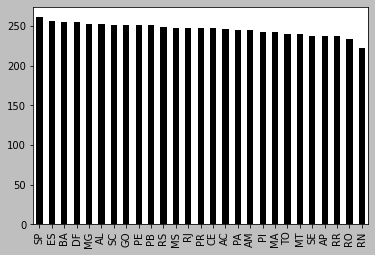

In [ ]:
#Checando a distribuição de observaçoes por estado
frequencia = df_filtrado.state.value_counts()
frequencia.head()
frequencia.plot(kind = 'bar')
#Podemos notar que o numero de observaçoes não possui uma grande variação,
#sendo são paulo o estado com mais observaçoes e rio grande do norte o estado com menos observações

In [ ]:
df_filtrado.head()

,date,state,place_type,confirmed,deaths,is_last,estimated_population
0,2020-11-17,AC,state,33475,709,True,894470.0
1,2020-11-16,AC,state,33295,708,False,894470.0
2,2020-11-15,AC,state,33156,708,False,894470.0
3,2020-11-14,AC,state,32991,708,False,894470.0
4,2020-11-13,AC,state,32661,707,False,894470.0


#Somando a quantidade de mortes e casos confirmados por estado ao longo do periodo

---



In [ ]:
#A função groupby permitiu realizar a soma de 'deaths' e 'confirmed' por 'state'
morte_estados = df_filtrado[['deaths', 'confirmed'] ].groupby(df['state'])
morte_estados = morte_estados.sum()
morte_estados.head()

,deaths,confirmed
state,,
AC,94216,3861781
AL,291141,11367104
AM,648747,19794600
AP,101417,6593626
BA,807807,36962400


In [ ]:
#Agora é adicionada a coluna mortes/confirmados
morte_estados['taxa_mortalidade%'] = morte_estados['deaths'] / morte_estados['confirmed'] * 100
morte_estados.head()

,deaths,confirmed,taxa_mortalidade%
state,,,
AC,94216,3861781,2.439703
AL,291141,11367104,2.561259
AM,648747,19794600,3.277394
AP,101417,6593626,1.538107
BA,807807,36962400,2.185483


In [ ]:
#Usando a função sort_values para ordenar o dataset pelo valor de taxa de mortalidade
morte_estados = morte_estados.sort_values('taxa_mortalidade%', ascending = False)
morte_estados.head()

,deaths,confirmed,taxa_mortalidade%
state,,,
RJ,2613669,35203156,7.424530
PE,1220504,19701947,6.194840
CE,1383821,33675951,4.109226
SP,4613738,116716251,3.952953
RN,291405,8407878,3.465857


In [ ]:
#Aqui criamos uma nova coluna com o valor de State, e resetamos o index do dataset. 
#Isto é feito para futuramente unir esse dataset ao dataset com dados do PIB dos estados
morte_estados['state'] = morte_estados.index
morte_estados.reset_index(drop = True, inplace = True)
morte_estados.head()

,deaths,confirmed,taxa_mortalidade%,state
0,2613669,35203156,7.424530,RJ
1,1220504,19701947,6.194840,PE
2,1383821,33675951,4.109226,CE
3,4613738,116716251,3.952953,SP
4,291405,8407878,3.465857,RN


#Adicionando a base de dados com o PIB de cada estado em 2017

In [ ]:
pib = pd.read_csv("/content/PIB2017.csv", sep = ";"  )
pib.head()

,state,PIB
0,AC,14271
1,AL,52843
2,AP,15480
3,AM,93204
4,BA,268661


In [ ]:
#Unindo os datasets
df2 = morte_estados.merge(pib)
df2 = df2.set_index('state')
df2.head()

,deaths,confirmed,taxa_mortalidade%,PIB
state,,,,
RJ,2613669,35203156,7.424530,671362
PE,1220504,19701947,6.194840,181551
CE,1383821,33675951,4.109226,147890
SP,4613738,116716251,3.952953,2119854
RN,291405,8407878,3.465857,64295


In [ ]:
#Aqui foram criados dois rankings. Um que ordena os estados pelo PIB  e outro que ordena os estados pela traxa de mortalidade
ranking_pib = df2.sort_values('PIB', ascending = False)
ranking_mortes = df2.sort_values('taxa_mortalidade%', ascending = False)

In [ ]:
#Estados ranked por PIB
ranking_pib = ranking_pib.drop(columns = ['deaths', 'confirmed', 'taxa_mortalidade%'])
ranking_pib

,PIB
state,
SP,2119854
RJ,671362
MG,576199
RS,423151
PR,421375
SC,277192
BA,268661
DF,244683
GO,191899


In [ ]:
#Estados ranked por taxa de mortalidade
ranking_mortes = ranking_mortes.drop(columns=['deaths', 'confirmed','PIB'])
ranking_mortes


,taxa_mortalidade%
state,
RJ,7.424530
PE,6.194840
CE,4.109226
SP,3.952953
RN,3.465857
PA,3.366788
AM,3.277394
MT,2.937438
ES,2.812249


#Aqui podemos ver que a hipótese não se confirma, já que os estados com maior PIB não necessariamente possuem uma taxa de mortalidade baixa. A exemplo do Rio de Janeiro, que possui o segundo aior PIB do Brasil porém é o estado commaior mortalidade entre os 27 estados brasileiros.

Correlação entre PIB e taxa_mortalidade%
- A correlação entre essas duas variáveis é de 0.33 o que indica que elas possuem uma correlação positiva, porém muito próxima a zero. Isto indica que a correlação é muito fraca

In [ ]:
df2['PIB'].corr(df2['taxa_mortalidade%'])

0.3305642812613499

#Visualização gráfica dos rankings

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
ranking_pib['state'] = ranking_pib.index
ranking_pib.reset_index(drop = True, inplace = True)

ranking_mortes['state'] = ranking_mortes.index
ranking_mortes.reset_index(drop = True, inplace = True)

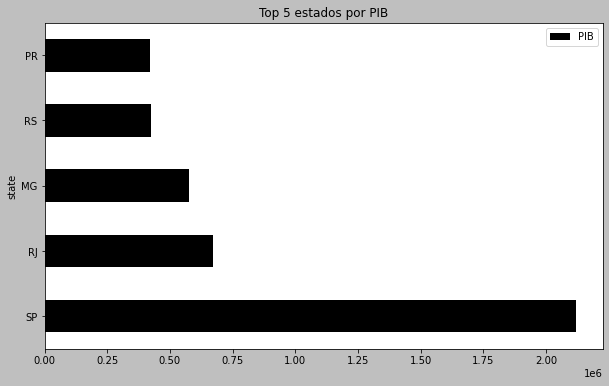

In [ ]:
ranking_pib.head(5).plot(y = 'PIB',
                    x = 'state',
                    kind = 'barh',
                    figsize = (10,6) , 
                    title = "Top 5 estados por PIB",                    
                    )
plt.style.use('grayscale')

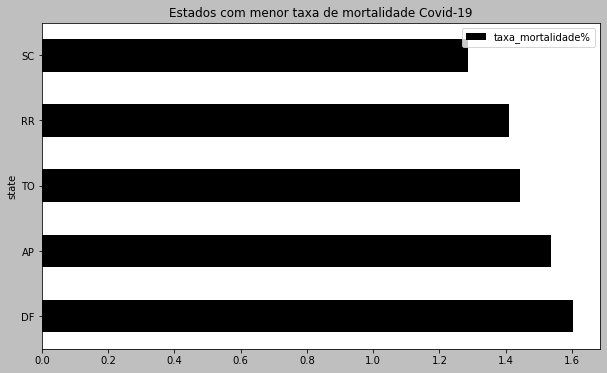

In [ ]:
ranking_mortes.tail(5).plot(y = 'taxa_mortalidade%',
                    x = 'state',
                    kind = 'barh',
                    figsize = (10,6) , 
                    title = "Estados com menor taxa de mortalidade Covid-19",                    
                    )
plt.style.use('grayscale')